# LangChain Theory
**Disclaimer:** The content and the views presented during the workshop are the author’s own and not of any organizations/companies they are associated with.
</br></br>
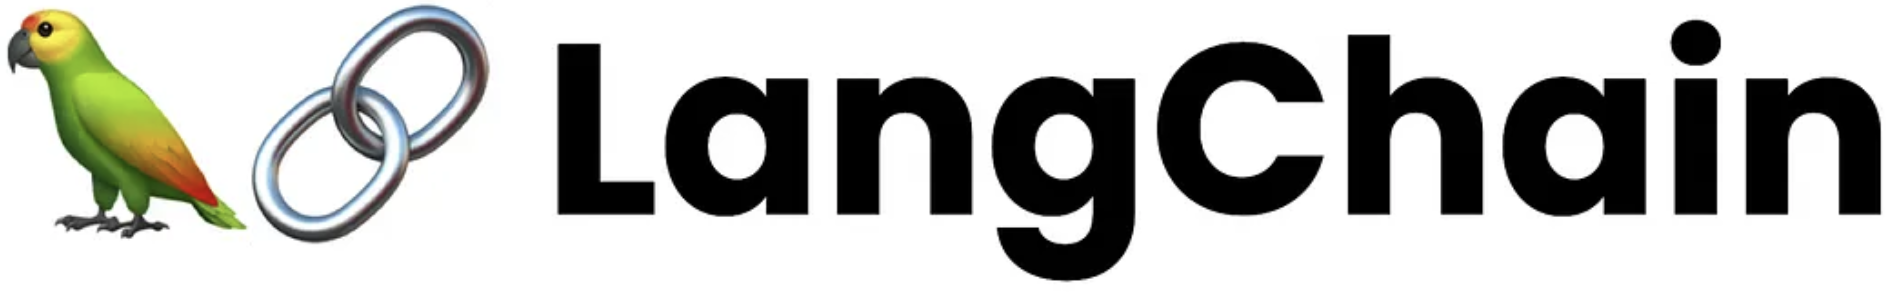


## An Overview
* An <u>*open-source*</u> framework.
* Helps develop applications powered by <u>*LLMs*</u>.
  * Provides <u>*standard interface*</u> for LLMs.
    * Flexibility to <u>*swap providers*</u> without having to change the underlying code.
* Plethora of <u>*integrations*</u>.
* Native tools for <u>*Productionization*</u> and <u>*Deployment*</u>.
* Offers <u>*Python API*</u>.

## The LangChain Stack: Simplifying LLM Application Lifecycle
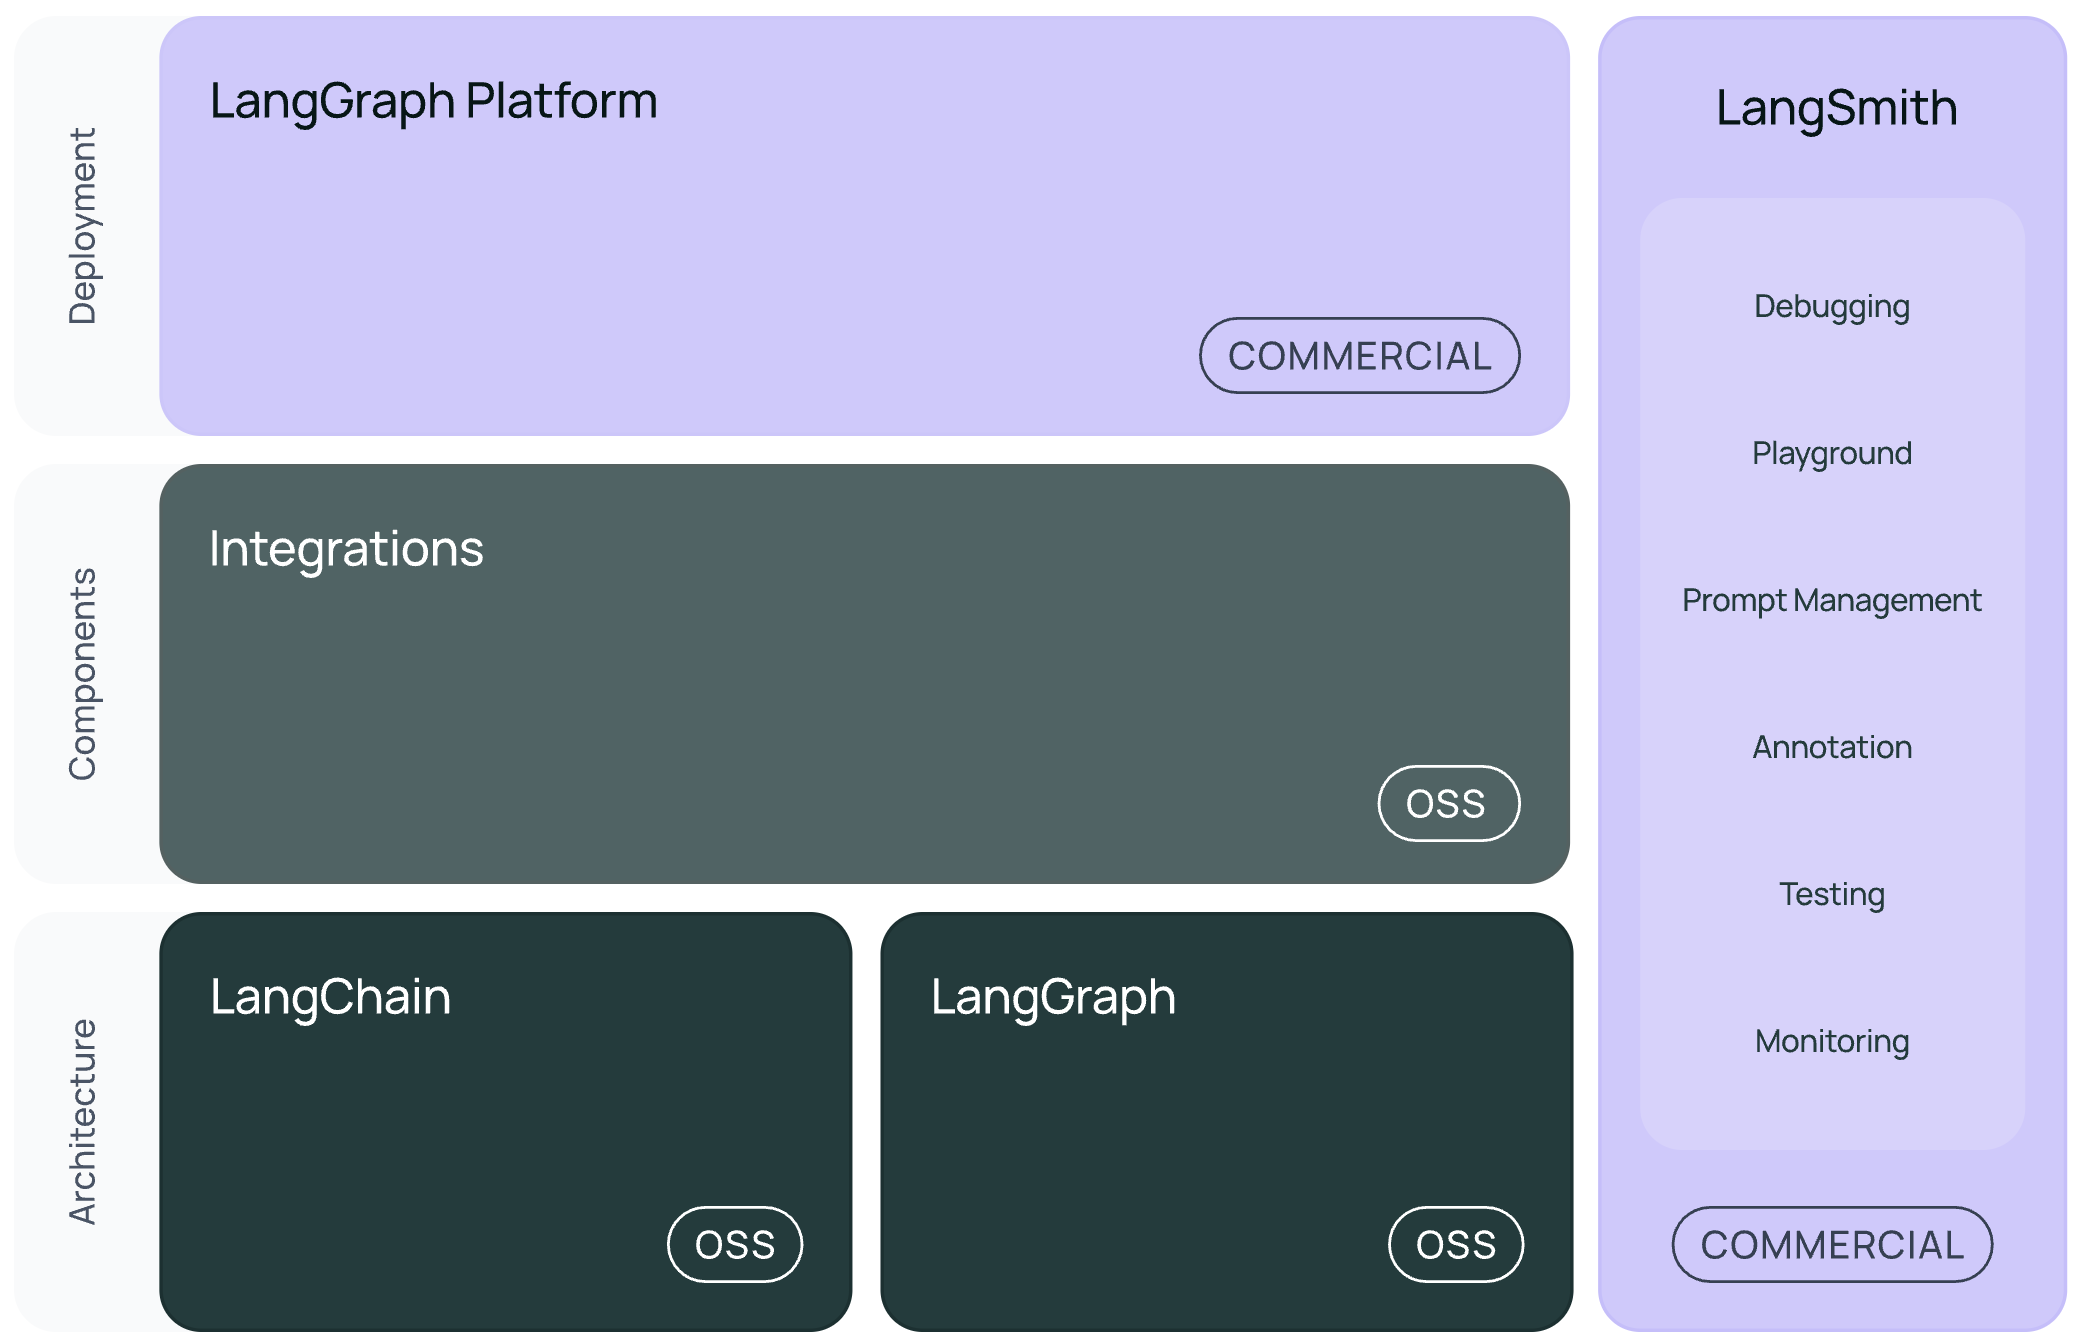

> **Source:** [LangChain Stack - LangChain's Official Documentation](https://python.langchain.com/svg/langchain_stack_112024.svg)

## LangChain Architecture: A Composition of Packages
The LangChain framework is comprised of a number of packages (Python Packages), as stated below:
* **langchain-core [[Source](https://python.langchain.com/api_reference/core/index.html)]:**
  * The base package for the LangChain ecosystem.
  * Very lightweight.
  * Contains essential core abstractions, interfaces, data structures and schemas, and fundamental building blocks upon which LangChain is built.
    * Interfaces for core components like Chat Models, Vector Stores, and Tools are defined in the `langchain-core` package.
      * It should be noted that the definitions for some of the key LangChain-specific Python Classes are defined in the `langchain-core` package.
    * Even the core classes and interfaces backing **LangChain Expression Language (LECL)** are defined in the `langchain-core` package.
  * Doesn't have any third-party integrations defined.
  
  ```
  # Package instalation.
  pip install langchain-core
  ```
* **langchain [[Source](https://python.langchain.com/api_reference/langchain/index.html)]:**
  * Often considered as the main package for the LangChain framework.
  * Serves as a comprehensive toolkit aggregating many useful components.
  * Builds directly upon the `langchain-core` package.
    * Consider the `langchain-core` package to be a required dependency in order to work with the `langchain` package.
  * The `langchain` package contains the Python Classes for standard **chains**, **agents** and their executors, **indexes**, **output_parsers**, helper utilities, etc.

  ```
  # Package instalation.
  pip install langchain
  ```
* **Integration Packages:**
  * Integration packages for some of the most commonly used integrations like `langchain-openai`, `langchain-anthropic`, etc.
  * List of the supported Integration Providers can be found [here](https://python.langchain.com/docs/integrations/providers/).

  ```
  # Package instalation.
  # pip install langchain-<provider-name>
  pip install langchain-openai
  pip install langchain-anthropic
  ```
* **langchain-community [[Source](https://python.langchain.com/api_reference/community/index.html)]:**
  * The integrations that don't have their independent packages can be installed via the `langchain-community` package.
  * The said third-party integrations are maintained by the LangChain Community.

  ```
  # Package instalation.
  pip install langchain-community
  ```
* **langchain-experimental [[Source](https://python.langchain.com/api_reference/experimental/index.html)]:**
  * The package containing the LangChain code which is intended for research and experimental purposes.
  * Think of it as an incubator space - the components do not have stable APIs and can even have breaking changes introduced.
  * Not fit for production deployments.

  ```
  # Package instalation.
  pip install langchain-community
  ```
* **langgraph:**
  * A library (or rather an orchestration framework) for building stateful, multi-actor applications with LLMs.
  * LangGraph can be used with or without LangChain integration.
  * Used generally for creating Agents and custom flows.
    * Helps exercise features like persistence (long-term memory), streaming, etc.
    * Allows for steering Agents' actions with moderation checks and **Human-in-the-Loop (HITL)** approvals.
    * Enables real-time visbility into Agents' reasoning and actions.

  ```
  # Package instalation.
  pip install langgraph
  ```
* **langserve:**
  * Helps deploy LangChain Runnables and Chains as REST APIs.
  * Very much used in production workloads for serving APIs.
  * Gets installed automatically if using LangChain CLI (explained in the next section), else can be separately installed, as shown below.

  ```
  # Package instalation for both client and server dependencies.
  pip install "langserve[all]"

  # Package instalation for client dependencies.
  pip install "langserve[client]"

  # Package instalation for server dependencies.
  pip install "langserve[server]"
  ```
* **langchain-cli:**
  * A CLI to help create and manage LangChain projects that are built using LangServe.
  * Provides project scaffolding and templating.
  * Allows for easy addition of new API Endpoints (Routes).

  ```
  # Package instalation.
  pip install langchain-cli
  ```
* **langsmith:**
  * LangSmith is a platform for debugging, testing, evaluating, and monitoring the LLM applications (which could or could not have been built using the LangChain framework).
    * Additional key features include dataset management, prompt comparison, and tracing.
  * LangSmith is not dependent on the `langchain-core` package.
  * The `LangChain SDK` gets automatically installed by LangChain. It can even be independently installed, as shown below.

  ```
  # Package instalation.
  pip install langsmith
  ```

### LangChain Package Dependency Graph
With the exception of the `langsmith` SDK, all the packages in LangChain ecosystem depend on the `langchain-core` package, as shown below.
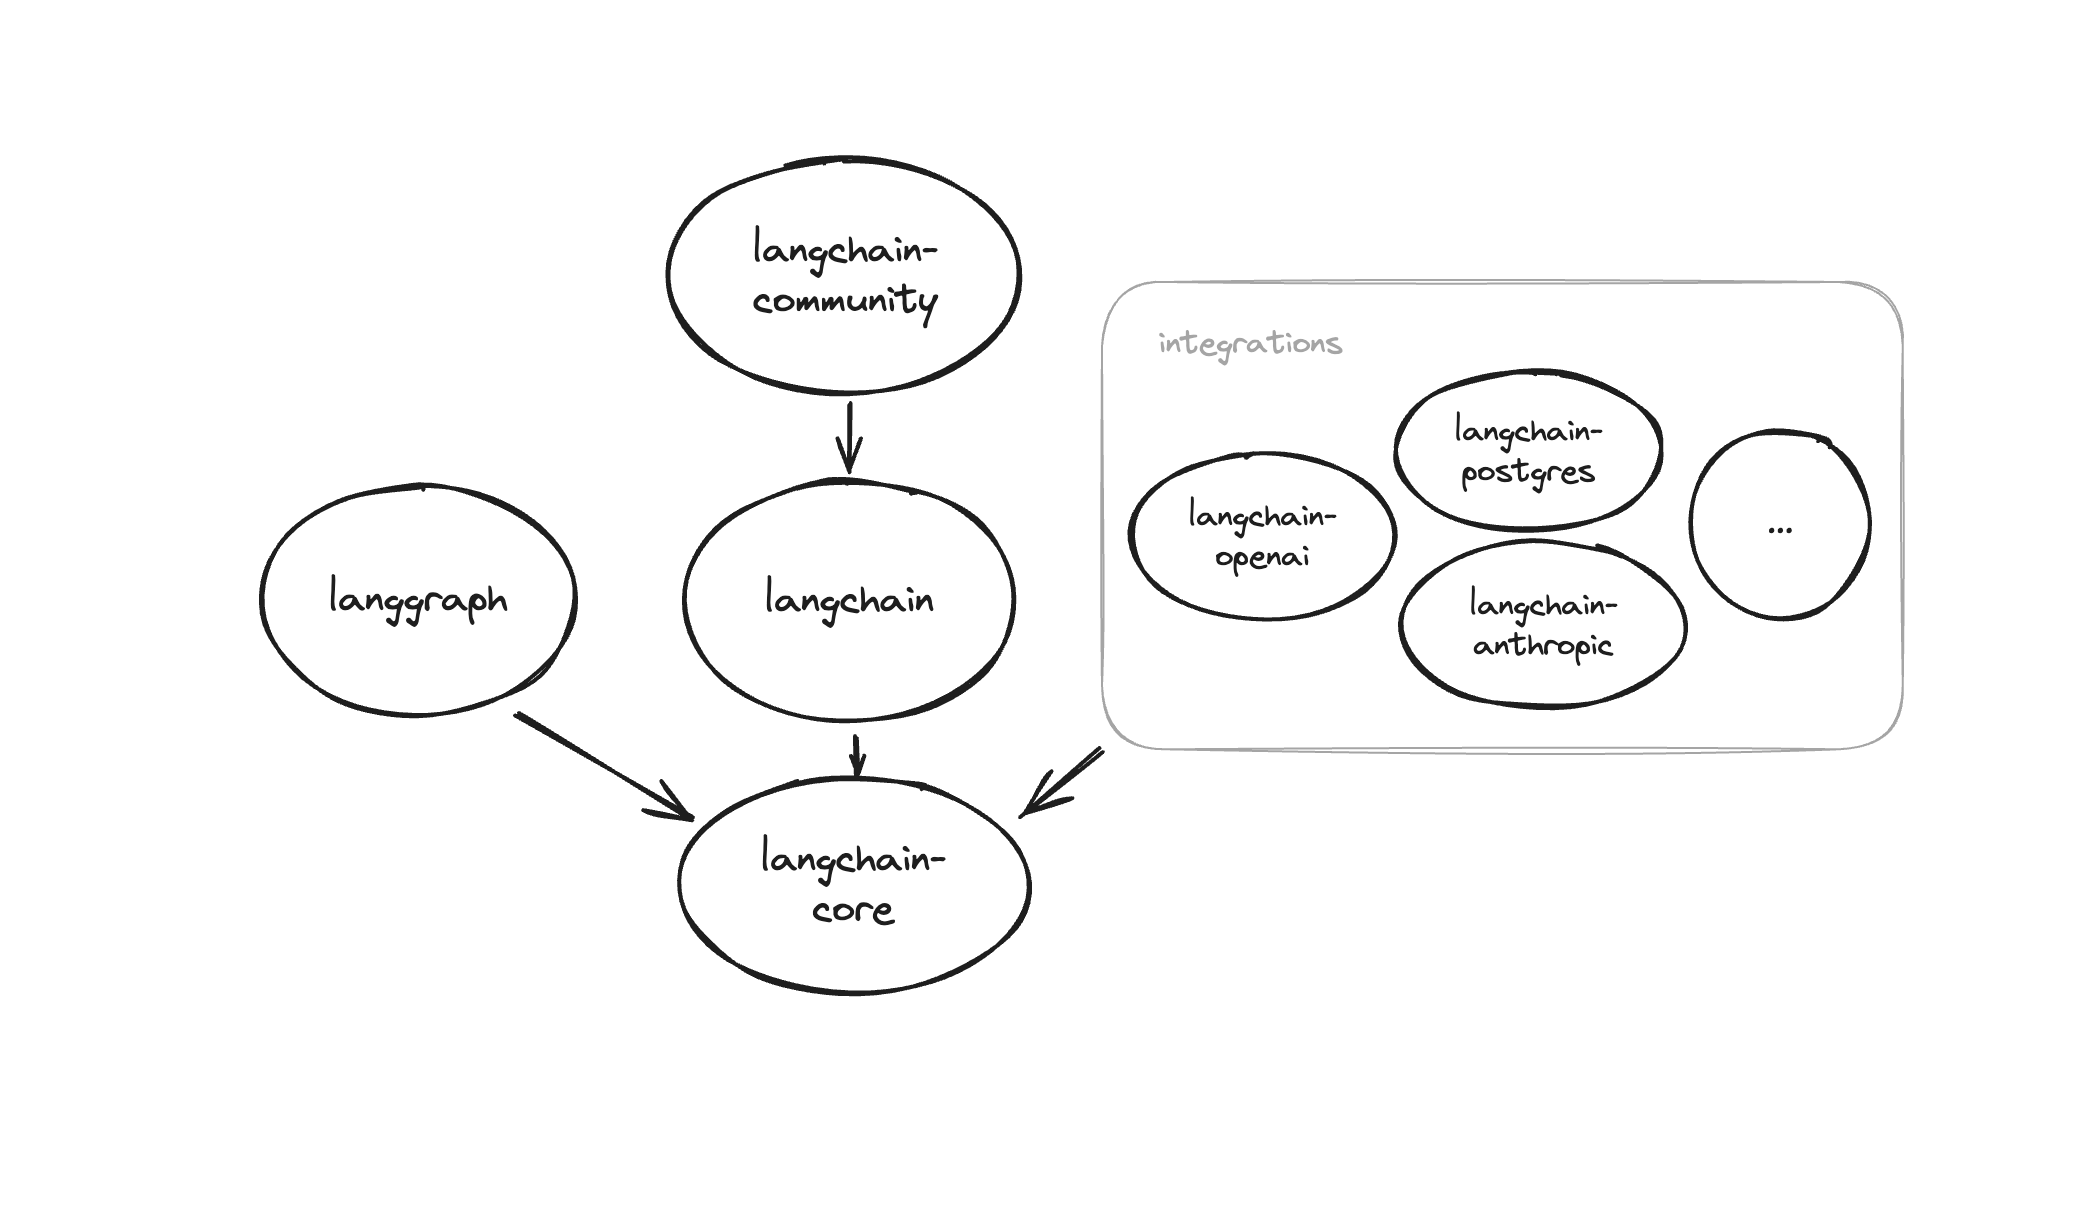

> **Source:** [LangChain Package Dependency Graph](https://python.langchain.com/assets/images/ecosystem_packages-32943b32657e7a187770c9b585f22a64.png)

## LangChain Components
LangChain components should be thought of as Python Classes or interfaces that act like Lego bricks for constructing LLM applications using the LangChain framework.

There are a plenty of LangChain components available and a few of them are stated below:
* **Model I/O Components:**
  * These components help in handling interactions with the **Language Models**.
    * Language Models can be imagined in terms of **Large Langauge Models** and **Chat Models**.
      * **Large Language Models** are advanced Machine Learning models that are suitable for performing a variety of language-related tasks such as text translation, summarization, generation, question answering, toning, etc. without needing task-specific fine tuning for every scenario.
        * Large Language Models take a string as input and returns a string as output.
      * **Chat Models** are relatively new and use a sequence/list of **messages** as inputs and returns a list of messages as output.
        * **Messages** in the context of Chat Models represent the unit of communication for the Chat Models.
          * Messages are used to represent the input and output of a Chat Model, as well as represent any additional context or metadata that may be associated with a conversation.
            * **Inside a Message:**
              * Inside a Message are two pieces of information, typically, as stated below:
                * **Role [[Source](https://python.langchain.com/docs/concepts/messages/#role)]:** The role of the message. Roles help in distinguishing between the different types of messages and accordingly responding to the list of messages received.
                  * For example, the following are some of the valid Roles:
                    * **user:** Represents a real user interacting with the Chat Model.
                    * **assistant:** Represents response from a model whcih can include text or request to invoke tools.
                
                  A typical conversation structure looks like the one shown below:
                  > User Message: "Hello, how are you?"

                  >Assistant Message: "I'm doing well, thank you for asking."

                  > User Message: "Can you tell me a joke?"

                  > Assistant Message: "Sure! Why did the scarecrow win an award? Because he was outstanding in his field!"

                * **Content:** The content of the message, for example, text or multimodal data.
              * Additionally, there could be some metadata including id, name, token usage, and model-specific information present in the Message.
          * **LangChain Messages [[Source](https://python.langchain.com/docs/concepts/messages/#langchain-messages)]** offer a unified message format that can be leveraged with all the Chat Models. Behind the scenes, LangChain Messages are implemented as Python objects.
            * **LangChain Message Types:** SystemMessage, HumanMessage, AIMessage, AIMessageChunk, ToolMessage, etc.
        * The Chat Models offer additional capabilities like:
          * **Tool Calling:** Allows LLMs to interact with external services, APIs, and datastores to perform various tasks.
          * **Structured Outputs:** Helps in returning structured responses - like a formatted JSON response.
          * **Multi-Modality:** Enables the LLMs to work with data formats other than text, for example, images, speech, video, etc.
          * **Miscellaneous:** Async Programming, Batching, Streaming, Rate Limiting, Caching, etc. are possible via Chat Models.
        * It is recommended to leverage Chat Models over the traditional LLMs because of the additional capabilities one gets with the Chat Models.
  * **Prompt Templates:**
    * Prompt Templates are leveraged for formatting the inputs to the models so as to combine the instructions and context to have better formatted prompt.
    * Prompt Templates help in searializing, versioning, and reusing the static parts of a model prompt.
    * Prompt Template takes as input a dictionary, where each key represents a variable in the Prompt Template to fill in.
      * **MessagesPlaceholder [[Source](https://python.langchain.com/docs/concepts/prompt_templates/#messagesplaceholder)]** can be leveraged to allow users to pass a list of messages to the Prompt Template.
  * **Output Parsers:**
      * Helps in structuring the raw outputs from the models into more usable formats like JSON, lists, strings, etc.
        * For production use-cases, it is common to have Pydantic objects returned using the `PydanticOutputParser`.
      * Output Parsers used to be very common prior to Tool Calling and **Structured Outputs** became common.
        * Output Parsers are a bit vulnerable in the sense that if the LLM deviates even slightly from the format which the parser expects, the parsing could fail and lead to errors.
        * **Structured Outputs** are generally available as part of new-age LLM APIs or inference engines which guide the models to generate outputs that inherently conform to some pre-defined schema.
        * Output Parsers are still considered rich when it comes to its universitality aspect as they can work with any text-generating LLM, unlike Structured Outputs.
      * It should be noted that as of the time of conducting this workshop, LangChain doesn't support multimodal outputs but supports multimodal inputs.
* **Retrieval Components:**
  * **Document Loaders:**
    * A Document Loader helps in loading data from various sources, including files, web pages, databases, etc.
      * LangChain has numerous integrations with various data sources to perform the document loading operations.
  * **Text Splitters:**
    * A Text Splitter helps in breaking large documents into smaller, manageable chunks to make them suitable for embedding and retrieval.
      * Document splitting is a crucial pre-processing step for many applications.
        * Text Splitters can also be leveraged to overcome input size limitations for different models and improving the text representations.
        * Non-uniform document lengths can be handled using the Text Splitters.
      * Splitting can be length-based (character-based or token-based), text-structure based (like split on paragraphs or sentences based on some pre-defined chunk size), document-structure based (like split on HTML tags, headers, JSON objects, etc.), semantic meaning based, etc.
        * **Chunk Overlap** is generally recommended for maintaining context across different chunks of document.
  * **Embedding Models:**
    * Helps in translating text or document chunks into dense numerical/mathematical vectors (embeddings) in the vector space.
      * Different providers offer different embedding models.
        * For example, `OpenAIEmbeddings` and `GoogleGenerativeAIEmbeddings` are the embedding models available from OpenAI and Google, respectively.
    * It should be noted that LangChain, as of the time of conducting this workshop, doesn't support multimodal embedding models.
  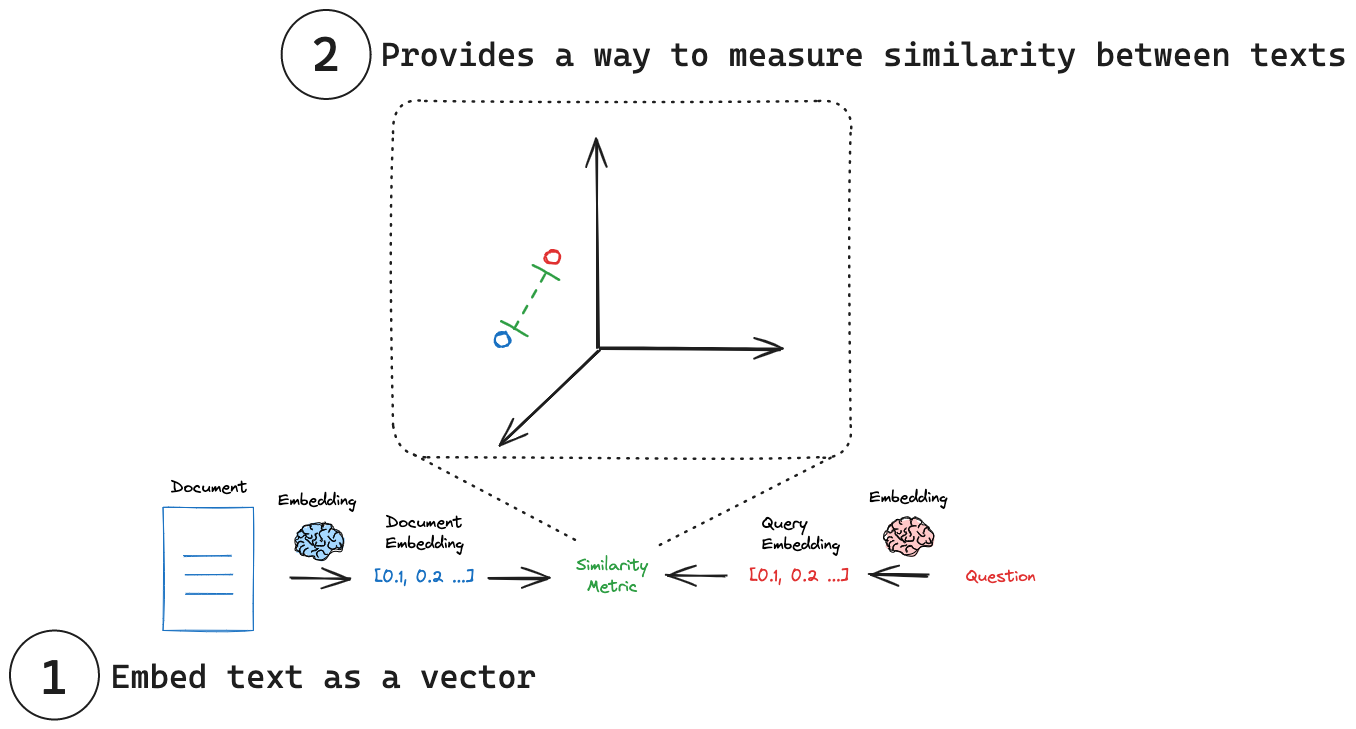

    > **Source:** [Vector Embeddings](https://python.langchain.com/assets/images/embeddings_concept-975a9aaba52de05b457a1aeff9a7393a.png)

    * LangChain supports embeddings for documents as well as text queries.
    * Each embedding is a set of coordinates in a high-dimensional space and hence similarity differences can be calculated to understand the degree of similarity between two embeddings.
      * Cosine Similarity, Euclidean Distance, Dot Product, etc. can be leveraged.
        * **Cosine Similarity** measures the cosine of the angle between two vectors (and doesn't consider the magnitude of the vectors), likewise, **Euclidean Distance** measures the straight-line distance between two points.
        * **Dot Product** helps in measuring the projection of one vector onto another.
  * **Vector Stores:**
    * Vector Stores store the chunks of texts along with their corresponding embeddings for performing efficieng similarity searches.
      * Chroma, FAISS, Pinecone, etc. are some of the examples of Vector Stores.
      * Some Vector Stores also provide indexing capabilities for fast retrievals.
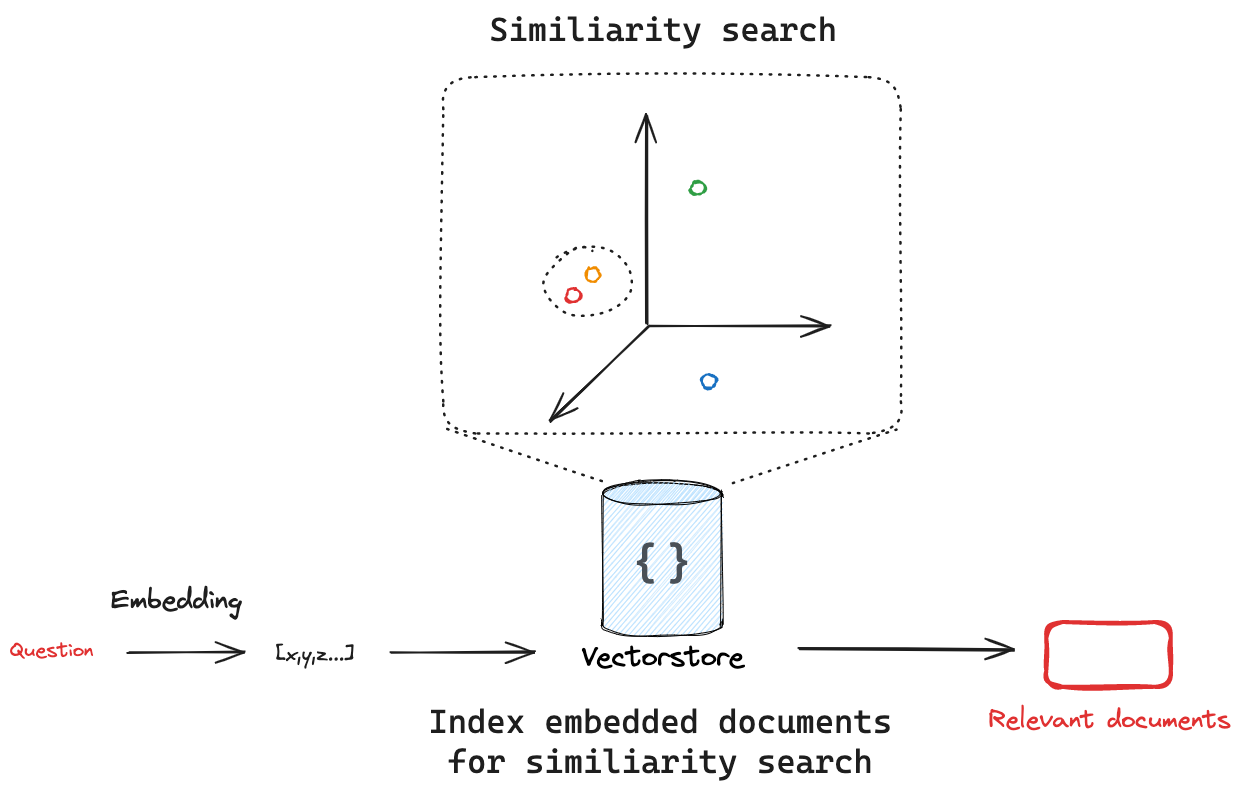

    > **Source:** [Similarity Search](https://python.langchain.com/assets/images/vectorstores-2540b4bc355b966c99b0f02cfdddb273.png)
  * **Retrievers:**
    * A Retriever is an interface that returns **documents** (pieces of information along with some metadata) given an unstructured query.
      * Basically, a string query is accepted as input and a list of documents is returned as output.
        * A **Document** has two attributes, namely, `page_content` (a string representing the content of the document) and `metadata` (metadata associated with the document).
    * A Retriever can be created from Vector Stores but can also include other repositories such as Wikipedia Search (Search API) etc. or data sources like Graph Databases or Relational Databases.
      * A Retriever doesn't need to actually store documents. The Retrievers can directly return results from APIs as well.
      * When talking about leveraging Graph or Relational Databases for retrieval purposes, a structured query (like text-to-SQL conversion) needs to be created from natural language.
    * Retrieval systems have become very important component for RAG (Retrieval-Augmented Generation) implementation.
    * For complex use-cases, an **Ensemble** of retrievers can also be leveraged by defining their respective weights and their results can be fed to ranking algorithms.
* **Memory Components:**
  * Memory helps in storing, retrieving, and using information to understand the present context in order to assist the future LLM operations.
    * Agents can learn from the feedback and adapt to users' preferences.
  * From a perspective of retrieving conversation history and context, the following memory types are commonly used:
    * **ConversationBufferMemory:** Stores raw messages.
    * **ConversationSummaryMemory:** Summarizes the conversation and stores as memory.
    * **VectorStoreRetrieverMemory:** Stores memories in Vector Stores.
  * Memory can be of two broad types - more relevant for LangGraph:
    * **Short-Term Memory:**
      * It is often known as **Thread-Scoped Memory** as it can be recalled at any time within a single conversational thread with a user.
    * **Long-Term Memory:**
      * Long-Term Memory is generally shared across conversational threads so that it can be recalled at any time in any thread.
* **Agent Components:**
  * Helps develop applications where LLM can dynamically decide which actions to take using a set of available tools.
    * The tools can be functions or services which an agent can invoke to interact with the outside world, for example, Search, Mathematical Calculation, APIs, databases, etc.
  * Agents implement logic for reasoning and taking actions.

# LangChain Hands-On
**Disclaimer:** Some of the hands-on exercises are inspired by and are adaptations of the tutorials available for LangChain on its official website.

## Exercise 1: Text Translation LLM Application with Gemini API
This exercise intends to make the attendees familiar with the basic building blocks of an LLM application.

The attendees will learn:
* Using Language Models (Gemini API Chat Models will be focused upon);
* Basic Async and Streaming mode invocation; and
* Using Prompt Templates for achieving reusability of prompts.

In [ ]:
# Install the langchain package. Remember that the langchain package installs
# the langchain-core package as well on its own.
!pip install langchain

In [ ]:
# Install the package for Google Gemini API to be able to use its Chat Model.
!pip install -U langchain-google-genai

In [ ]:
# Invoke a sample model (Gemini 1.5 Pro, say) using the Chat Model class.

import os

from google.colab import userdata
from langchain_google_genai import ChatGoogleGenerativeAI

## Optional: Use dotenv if you load keys from a .env file.
## Requires: pip install python-dotenv
# from dotenv import load_dotenv
# load_dotenv()
#
# loaded_google_api_key = os.getenv("GOOGLE_API_KEY")

# Define the name of the environment variable LangChain expects for Google
# Gemini API's Key.
ENV_VAR_GOOGLE_API_KEY = "GOOGLE_API_KEY"

# Set the environment variable for Google Gemini API Key.
os.environ[ENV_VAR_GOOGLE_API_KEY] = userdata.get(ENV_VAR_GOOGLE_API_KEY)

# Define the model to be leveraged.
LLM_MODEL_NAME = "gemini-1.5-pro-latest"

# Initialize the Gemini LLM Model.
gemini_llm = ChatGoogleGenerativeAI(model=LLM_MODEL_NAME,
                             temperature=0.9,
                             max_output_tokens=50,
                            # google_api_key=loaded_google_api_key
                                    )

# Invoke the LLM with the prompt.
ai_msg_run_1 = gemini_llm.invoke("Create a short rhyme on trees for kids.")

In [ ]:
# Print the different fields of the AIMessage received for ai_msg_run_1.
print(f"AIMessage: {ai_msg_run_1}\n")
print(f"Content: {ai_msg_run_1.content}\n")
print(f"Usage Metadata: {ai_msg_run_1.usage_metadata}\n")

In [ ]:
# Demonstration of leveraging a list of Messages as input for the Chat Model.
# This demonstrates the text translation capability.
from langchain_core.messages import HumanMessage, SystemMessage

# Define the list of Messages for the prompt.
messages_for_translation = [
    SystemMessage("Translate the following text from English into Italian"),
    HumanMessage("Hey greatdevaks!"),
]

# Invoke the LLM with the prepared list of messages.
ai_msg_run_2 = gemini_llm.invoke(messages_for_translation)

In [ ]:
# Print the different fields of the AIMessage received for ai_msg_run_2.
print(f"AIMessage: {ai_msg_run_2}\n")
print(f"Content: {ai_msg_run_2.content}\n")
print(f"Usage Metadata: {ai_msg_run_2.usage_metadata}\n")

In [ ]:
# Stream individual tokens from the Chat Model.
for token in gemini_llm.stream(messages_for_translation):
    print(token.content, end="|")

In [ ]:
# Prompt Template demonstration.
from langchain_core.prompts import ChatPromptTemplate

# Define the template for the SystemMessage.
system_template = "Translate the following text from English into {language}"

# Define the Prompt Template.
prompt_template = ChatPromptTemplate.from_messages(
    [
        ("system", system_template),
        ("user", "{text_to_convert}")
    ]
)

# Initialize the templatized prompt by referencing the required values.
templatized_prompt = prompt_template.invoke({"language": "Italian", "text_to_convert": "Hey LNMIIT!"})

In [ ]:
# Check the ChatPromptValue object.
templatized_prompt

In [ ]:
# Invoke the LLM with the templatized prompt.
ai_msg_run_3 = gemini_llm.invoke(templatized_prompt)

In [ ]:
# Print the different fields of the AIMessage received for ai_msg_run_3.
print(f"AIMessage: {ai_msg_run_3}\n")
print(f"Content: {ai_msg_run_3.content}\n")
print(f"Usage Metadata: {ai_msg_run_3.usage_metadata}\n")

## Exercise 2: Text Sentiment Classification with Structured Outputs with Gemini API and Pydantic
This exercise intends to make the attendees familiar with the following concepts:
* Basic usage of Pydantic for handling Structured Outputs.

In [ ]:
# Code for demonstrating usage of Pydantic Structured Output.

from langchain_core.prompts import ChatPromptTemplate
from pydantic import BaseModel, Field

# Templatized prompt to be fed to the LLM.
classification_prompt = ChatPromptTemplate.from_template(
    """
    Extract the desired information from the following passage.

    Passage:
    {input}
    """
)

# Pydantic schema.
class Classification(BaseModel):
  """
  Define the schema for the output of the LLM.
  Each field defined represents a specific piece of information that the LLM will output.
  The description for the fields act as a natural guidance for the LLM.
  """
  sentiment: str = Field(description="The sentiment of the text")
  aggressiveness: int = Field(
      description="How aggressive the text is on a scale from 1 to 10"
  )
  language: str = Field(description="The language the text is written in")


# Initialize the Gemini LLM Model with Structured Output leveraging the defined Pydantic schema.
gemini_llm = ChatGoogleGenerativeAI(model=LLM_MODEL_NAME,
                                    temperature=0.9,
                                    max_output_tokens=50,
                                    # google_api_key=loaded_google_api_key
                                    ).with_structured_output(Classification)

In [ ]:
# Define the input for inp_classification_prompt_run_1
inp_classification_prompt_run_1 = "Estoy increiblemente contento de haberte conocido! Creo que seremos muy buenos amigos!"

# Initialize the prompt by referencing the required values.
classification_prompt_run_1 = classification_prompt.invoke({"input": inp_classification_prompt_run_1})

# Invoke the LLM with the prompt inp_classification_prompt_run_1.
response_classification_prompt_run_1 = gemini_llm.invoke(classification_prompt_run_1)

In [ ]:
# Display the output of the text classification response_classification_prompt_run_1
response_classification_prompt_run_1

In [ ]:
# Define the input for inp_classification_prompt_run_2
inp_classification_prompt_run_2 = "John Doe has decided to play Lawn Tennis so rough that no opponent can win the game."

# Initialize the prompt by referencing the required values.
classification_prompt_run_2 = classification_prompt.invoke({"input": inp_classification_prompt_run_2})

# Invoke the LLM with the prompt inp_classification_prompt_run_2.
response_classification_prompt_run_2 = gemini_llm.invoke(classification_prompt_run_2)

In [ ]:
# Display the output of the text classification response_classification_prompt_run_2
response_classification_prompt_run_2

## Exercise 3: Playing with Document Loader, Embeddings, and Vector Store to Develop a Semantic Search Engine with Gemini API
This exercise intends to make the attendees familiar with the following concepts:
* Document Loader (handling PDF documents);
* Text Splitters;
* Vector Embeddings;
* Vector Stores; and
* Performing Semantic Search.

In [ ]:
# Install the packages for PyPDF and langchain-community.
!pip install langchain-community pypdf

In [ ]:
# Generating sample documents.

from langchain_core.documents import Document

# Initializing sample documents.
sample_documents = [
    Document(
        page_content="Dogs are great companions, known for their loyalty and friendliness.",
        metadata={"source": "mammal-pets-doc"},
    ),
    Document(
        page_content="Cats are independent pets that often enjoy their own space.",
        metadata={"source": "mammal-pets-doc"},
    ),
]

# Checking the sample documents.
sample_documents

In [ ]:
# Loading PDF documents.

import requests
import tempfile

from langchain_community.document_loaders import PyPDFLoader

# Define the URL for the PDF that should be downloaded.
pdf_url = "https://arxiv.org/pdf/1706.03762.pdf"

# Retrieve the PDF.
response = requests.get(pdf_url, stream=True)
response.raise_for_status()
print("Download successful. Saving to temporary file...")

# Save the downloaded file to a temporary file.
with tempfile.NamedTemporaryFile(delete=True, suffix=".pdf", mode='wb') as temp_pdf:
    # Write the downloaded content to the temporary file.
    for chunk in response.iter_content(chunk_size=8192):
        temp_pdf.write(chunk)

    # Ensure all data is written before loading.
    temp_pdf.flush()
    temp_file_path = temp_pdf.name
    print(f"PDF temporarily saved to: {temp_file_path}.")

    loader = PyPDFLoader(temp_file_path)
    docs = loader.load()
    print(f"Successfully loaded {len(docs)} document pages.")

print(f"Length of PDF: {len(docs)}\n")
print(f"{docs[0].page_content[1000:1500]}")

In [ ]:
# Text Splitter demonstration.

from langchain_text_splitters import RecursiveCharacterTextSplitter

# Split the document into chunks of 1000 characters with an overlap of 200 characters to carry-forward some context.
# add_start_index has been set to True so that the start index of each
# split can be registered from a perspective of the original document.
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000, chunk_overlap=200, add_start_index=True
)
all_splits = text_splitter.split_documents(docs)

len(all_splits)

In [ ]:
# Create Vector Embeddings for the splitted documents.

from langchain_google_genai import GoogleGenerativeAIEmbeddings

# Use the Embeddings model for Gemini.
vector_embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")

# Generate Embeddings for the first two splitted chunks.
vector_1 = vector_embeddings.embed_query(all_splits[0].page_content)
vector_2 = vector_embeddings.embed_query(all_splits[1].page_content)

assert len(vector_1) == len(vector_2)
print(f"Generated vectors of length {len(vector_1)}.\n")
print(vector_1[:10])

In [ ]:
# Install the langchain-core package, if not installed.
!pip install -U langchain-core

In [ ]:
# Leverage In-Memory Vector Store for demonstration.

from langchain_core.vectorstores import InMemoryVectorStore

# Push the Vector Embeddings object to initialize the Vector Store.
vector_store = InMemoryVectorStore(vector_embeddings)

# Index the splitted documents in the Vector Store.
idx = vector_store.add_documents(documents=all_splits)

In [ ]:
# Attempt querying the Vector Store.

query_results = vector_store.similarity_search(
    "What is the meaning of Attention?"
)

print(query_results[0])

In [ ]:
# Perform an Async call to the Vector Store for querying it.

async_query_results = await vector_store.asimilarity_search("Does Attention use Transformers?")

print(async_query_results[0])

In [ ]:
# Return the score. Note that providers implement different scores; the score here is a distance metric that varies inversely with similarity.

similarity_results = vector_store.similarity_search_with_score("BERT")
doc, score = similarity_results[0]
print(f"Score: {score}\n")
print(doc)